In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [5]:
# load in the dataset
df = pd.read_csv("cars.csv")

Data Preprocessing

In [38]:
# filtering out cars with any missing values
df.dropna(inplace=True)

# convert "Model year" & "Cylinders" to integer fields
integer_fields = ["Model year", "Cylinders", "CO2 emissions (g/km)", "Smog rating"]
for field in integer_fields:
    df[field] = df[field].astype(int)

**Regression**<br>
H0: Engine Size does not have an effect on CO₂ Emissions<br>
HA: Engine Size does have an effect on CO₂ Emissions

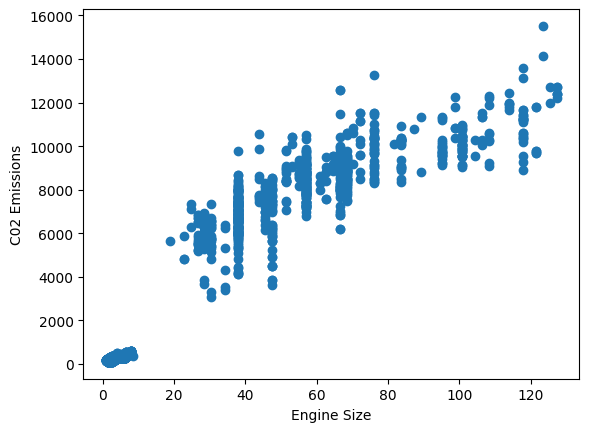

In [7]:
# visualizing hypothesis
plt.scatter(df["Engine size (L)"], df["CO2 emissions (g/km)"])
plt.xlabel("Engine Size")
plt.ylabel("C02 Emissions")
plt.show()

In [8]:
# compute p-value from regression analysis
result = linregress(df["Engine size (L)"], df["CO2 emissions (g/km)"])
print(result.pvalue)

0.0


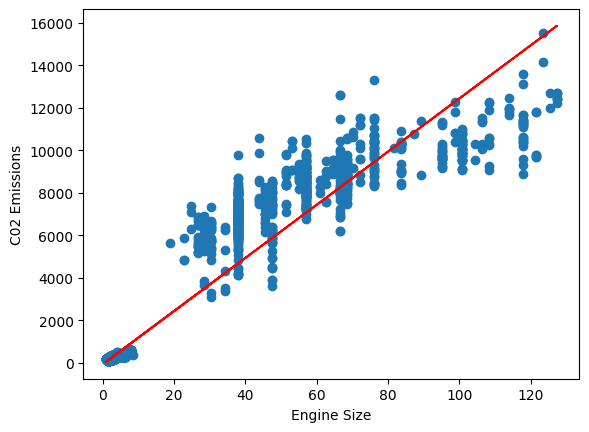

In [9]:
plt.scatter(df["Engine size (L)"], df["CO2 emissions (g/km)"])
plt.xlabel("Engine Size")
plt.ylabel("C02 Emissions")
plt.plot(df["Engine size (L)"], result.intercept + result.slope*df["Engine size (L)"], 'r', label='fitted line')
plt.show()

**One-Way ANOVA**<br>
H0: Fuel type does not affect CO2 emissions<br>
HA: Fuel type significantly affects CO2 emissions

In [30]:
# Get the list of fuel types and corresponding emissions
fuel_groups = [group['CO2 emissions (g/km)'].values
               for name, group in df.groupby('Fuel type')]

# Run ANOVA
f_stat, p_value = f_oneway(*fuel_groups)
print("ANOVA Test Results:")
print(f"F-statistic = {f_stat:.3f}")
print(f"P-value = {p_value:.5f}")

ANOVA Test Results:
F-statistic = 4.730
P-value = 0.00267


/tmp/ipython-input-2492406405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel type', y='CO2 emissions (g/km)', palette='Set3')


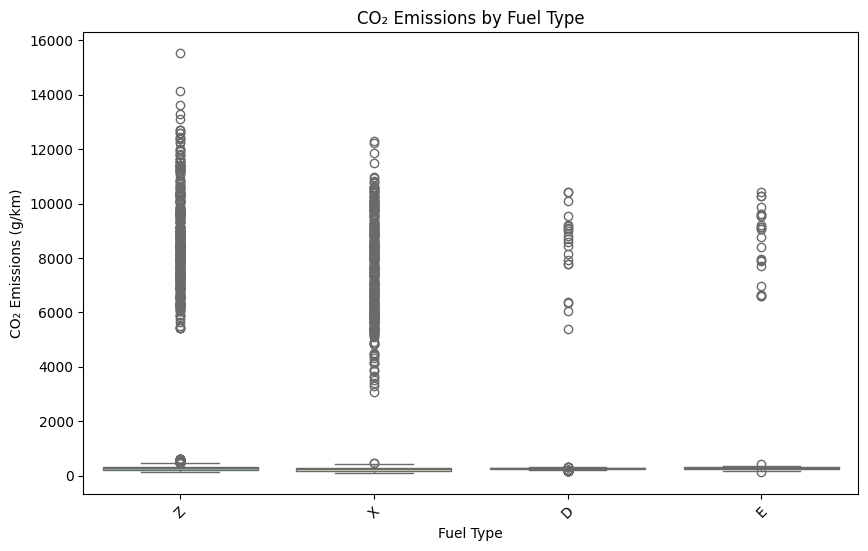

In [31]:
# Visualization
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Fuel type', y='CO2 emissions (g/km)', palette='Set3')
plt.title('CO₂ Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO₂ Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()

**Follow-Up Tukey Test**

**Chi-Square Test of Independence**<br>
H0: There is no association between fuel type and smog rating category.<br>
HA: There is an association between fuel type and smog rating category.<br><br>

Note -> Regarding smog ratings, vehicles that score a 10 are the **cleanest**. The categories are defined as such:<br>
Low: 1–3

Medium: 4–7

High: 8–10

In [42]:
# Creating smog rating categories
def categorize_smog(rating):
    if rating <= 3:
        return "Low"
    elif rating <= 7:
        return "Medium"
    else:
        return "High"

df["Smog Category"] = df["Smog rating"].apply(categorize_smog)

# Build the contingency table
contingency = pd.crosstab(df["Fuel type"], df["Smog Category"])

# Run the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)
print("\nChi-square test results:")
print(f"Chi2 Statistic: {chi2:.3f}")
print(f"P-value: {p:.4f}")


Chi-square test results:
Chi2 Statistic: 937.234
P-value: 0.0000


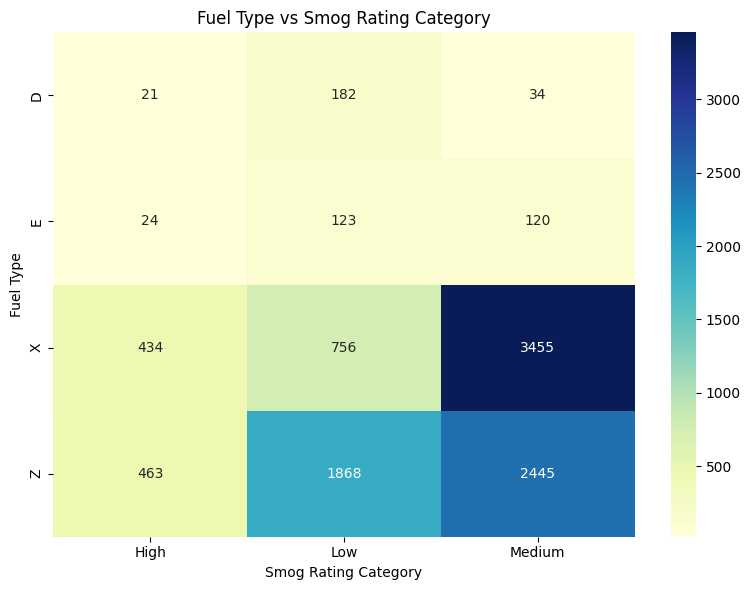

In [43]:
# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Fuel Type vs Smog Rating Category")
plt.xlabel("Smog Rating Category")
plt.ylabel("Fuel Type")
plt.tight_layout()
plt.show()